# Explicacion de un modelo : Arbol de Decision

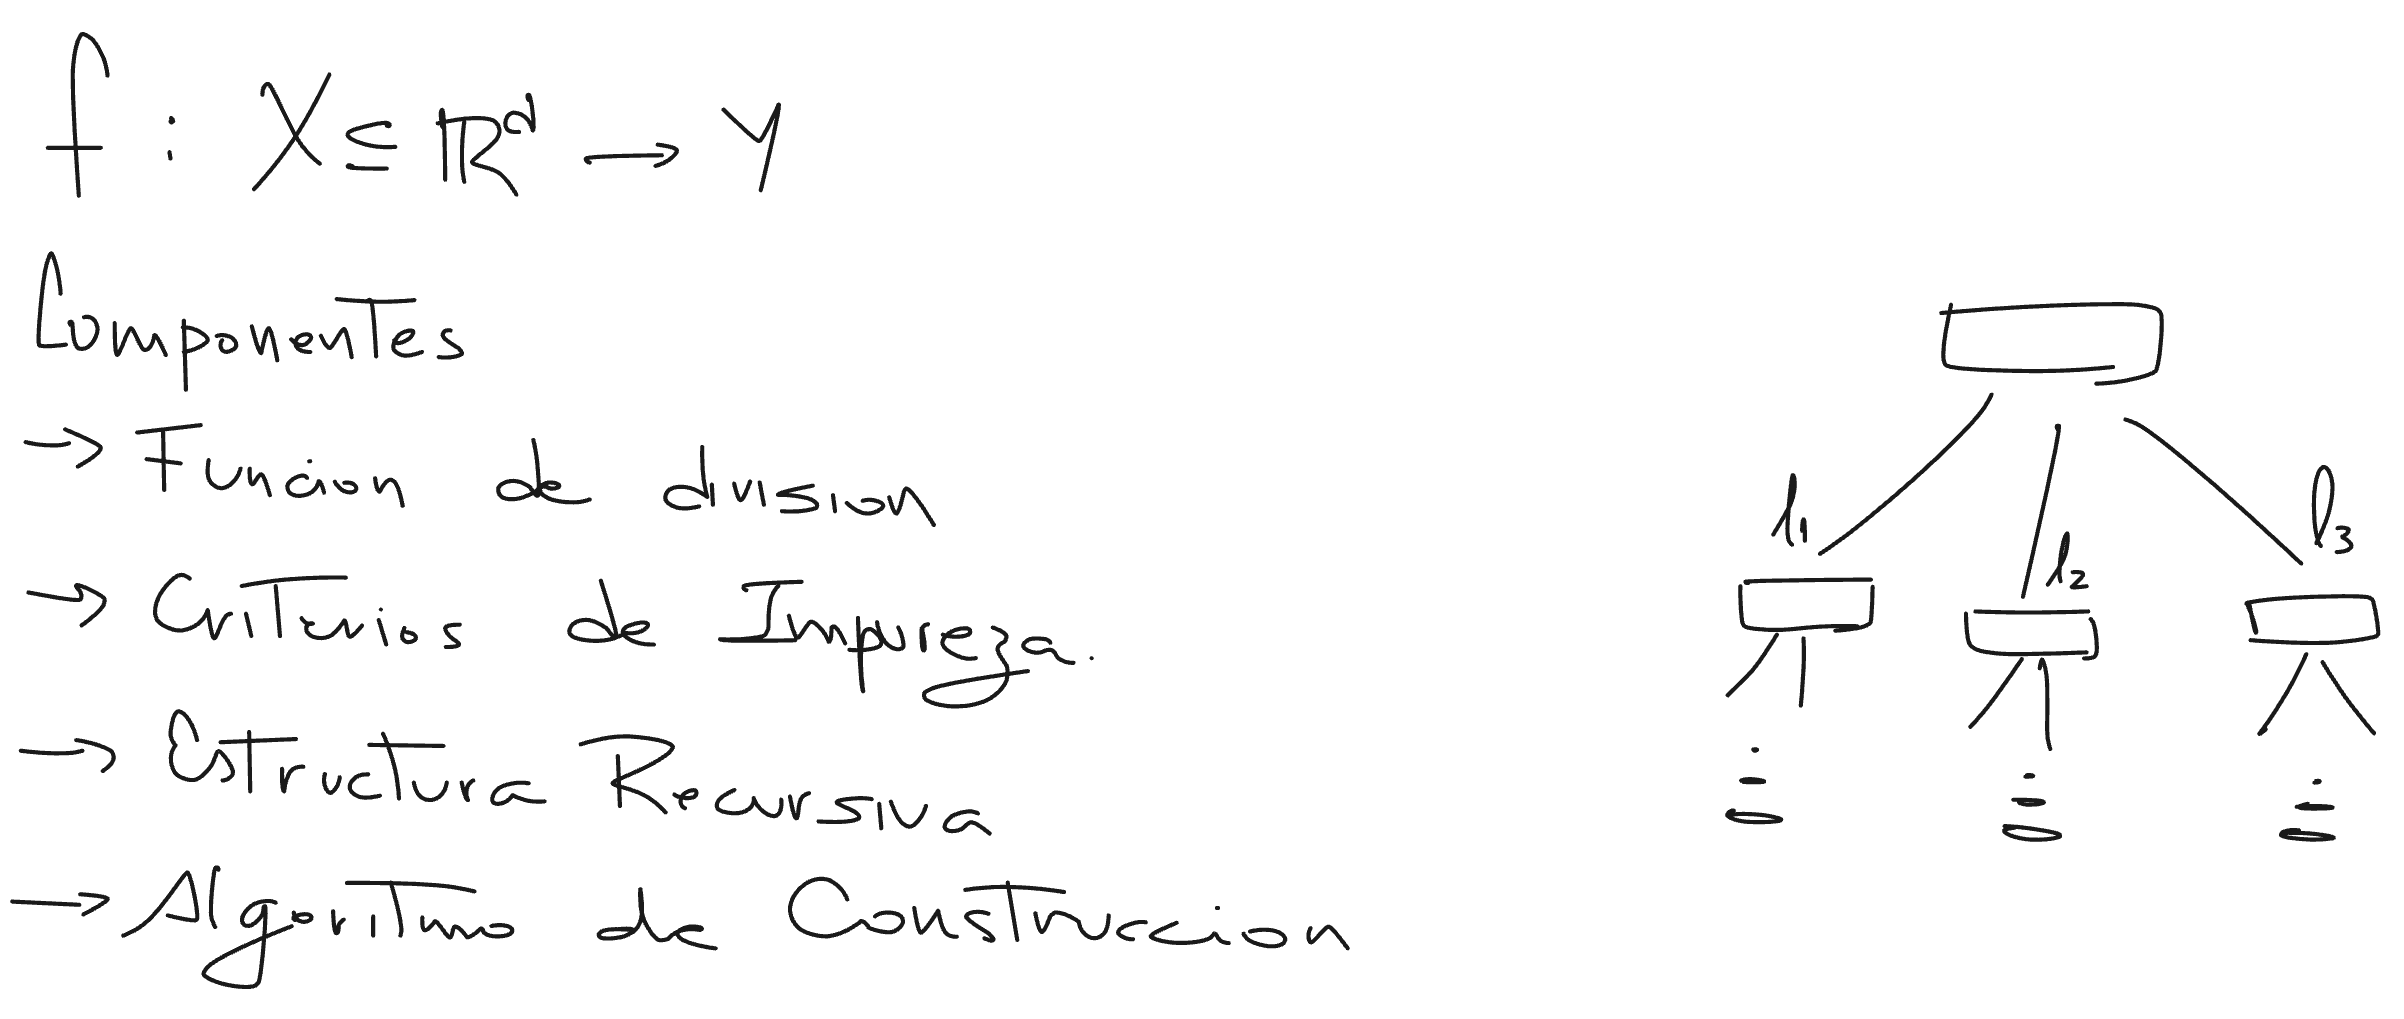

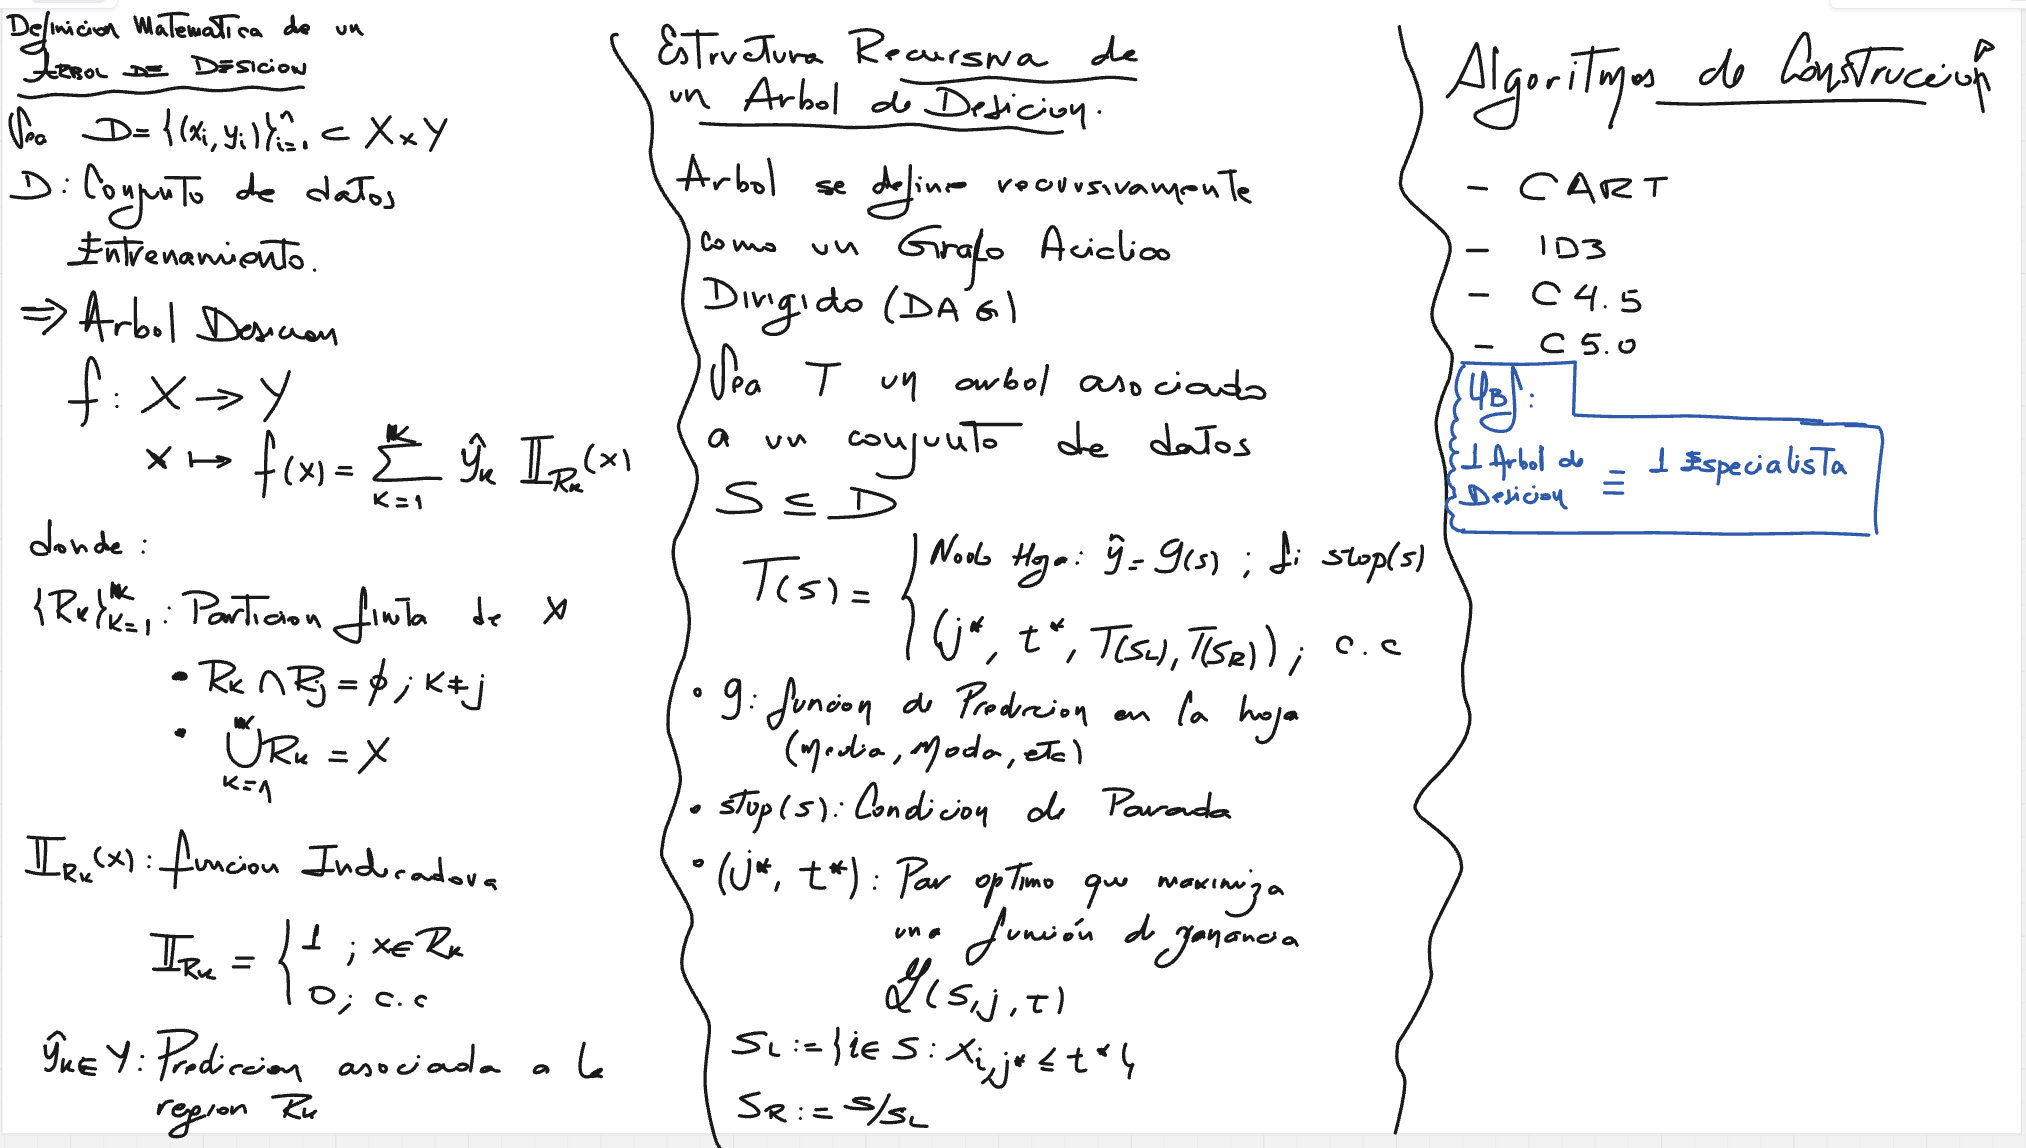

# A programar !!!

In [1]:
# Sklearn tiene el submodulo tree
import sklearn.tree
dir(sklearn.tree)

['BaseDecisionTree',
 'DecisionTreeClassifier',
 'DecisionTreeRegressor',
 'ExtraTreeClassifier',
 'ExtraTreeRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_classes',
 '_criterion',
 '_export',
 '_partitioner',
 '_reingold_tilford',
 '_splitter',
 '_tree',
 '_utils',
 'export_graphviz',
 'export_text',
 'plot_tree']

In [ ]:
# Problemas de clasificacion
# DecisionTreeClassifier
# ExtraTreeClassifier

In [ ]:
# Problemas de regresion
# DecisionTreeRegressor
# ExtraTreeRegressor

In [3]:
# Modulos y datos
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn import metrics

# Visualizacion de un modelo de tipo arbol
from sklearn.tree import  export_text, plot_tree, export_graphviz

# Datos
income = pd.read_csv("https://github.com/robintux/Datasets4StackOverFlowQuestions/raw/refs/heads/master/USA_Census_Income_Data.zip")
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   age                               200000 non-null  int64 
 1   class_of_worker                   200000 non-null  object
 2   industry_code                     200000 non-null  int64 
 3   occupation_code                   200000 non-null  int64 
 4   education                         200000 non-null  object
 5   wage_per_hour                     200000 non-null  int64 
 6   enrolled_in_edu_inst_lastwk       200000 non-null  object
 7   marital_status                    200000 non-null  object
 8   major_industry_code               200000 non-null  object
 9   major_occupation_code             200000 non-null  object
 10  race                              200000 non-null  object
 11  hispanic_origin                   199408 non-null  object
 12  se

In [4]:
# Valores faltantes : Expresados como porcentaje
income.isnull().sum().sort_values(ascending=False)*100/income.shape[0]

,0
migration_msa,33.3365
migration_reg,33.3365
migration_within_reg,33.3365
migration_sunbelt,33.3365
country_father,2.2610
country_mother,2.0680
country_self,1.1560
hispanic_origin,0.2960
state_of_previous_residence,0.2385
major_industry_code,0.0000


In [5]:
# Estrategia : Eliminemos todas las filas con algun valor faltantes
income = income.dropna()

# Verifiquemos que ya no existen valores faltantes
income.isna().sum().sum()

np.int64(0)

<Axes: xlabel='income_level'>

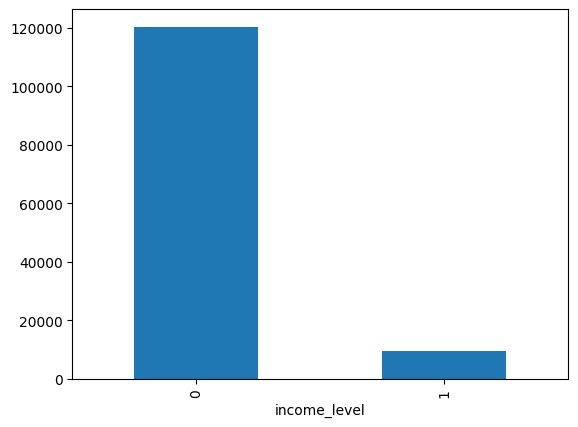

In [7]:
# Analicemos a la variable dependiente : income_level
income.income_level.value_counts().plot(kind = "bar")

In [15]:
# Construyamos un dataframe con el mismo numero de observaciones 0 que de observaciones 1 en la
# variable dependiente (income_level)

# Numero de valores 1 en la variable dependiente
num_valores_1 = income.loc[income.income_level == 1, : ].shape[0]

# Construyamos una muestra de observaciones 0 de tamaño num_valores_1
muestra_valores_0 = income.loc[income.income_level == 0 , : ].sample(num_valores_1)

# Construyamos un dataframe balanceado : la variable dependiente (income_level) por construccion
# ya tiene el mismo numero de valores 1 que de valores 0
income2 = pd.concat([muestra_valores_0, income.loc[income.income_level == 1,:]], axis = 0).sample(frac = 1)
income2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18648 entries, 72607 to 123620
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   age                               18648 non-null  int64 
 1   class_of_worker                   18648 non-null  object
 2   industry_code                     18648 non-null  int64 
 3   occupation_code                   18648 non-null  int64 
 4   education                         18648 non-null  object
 5   wage_per_hour                     18648 non-null  int64 
 6   enrolled_in_edu_inst_lastwk       18648 non-null  object
 7   marital_status                    18648 non-null  object
 8   major_industry_code               18648 non-null  object
 9   major_occupation_code             18648 non-null  object
 10  race                              18648 non-null  object
 11  hispanic_origin                   18648 non-null  object
 12  sex               

In [ ]:
# Construyamos dos modelos base
  # DecisionTreeClassifier
  # ExtraTreeClassifier

In [16]:
# Consideremos solo utilizar las variables de tipo int64

# Definicion de las variables independientes (X) y la variable dependiente (y)
X = income2.select_dtypes(include = ["int64"]).drop(["income_level"], axis = 1)
y = income2.select_dtypes(include = ["int64"]).income_level

# Particionamos nuestro conjunto de datos
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size= 0.95)

# Instanciamos las clases a modelar
dt_base = DecisionTreeClassifier()
et_base = ExtraTreeClassifier()

# Ajustamos estos modelos con el subconjunto de entrenamiento
dt_base.fit(Xtrain,ytrain)
et_base.fit(Xtrain, ytrain )

# Construyamos pronosticos para ytest a partir del modelo ajustado y de Xtest
y_forecast_dt_base = dt_base.predict(Xtest)
y_forecast_et_base = et_base.predict(Xtest)

# Calculemos indicadores de calidad para ambos modelos
acc_dt = metrics.accuracy_score(ytest, y_forecast_dt_base)
acc_et = metrics.accuracy_score(ytest, y_forecast_et_base)

# Mostremos los resultados
print("""
DecisionTree : %f
ExtraTree : %f
""" %(acc_dt, acc_et))



DecisionTree : 0.817792 
ExtraTree : 0.778135



In [17]:
# Mostremos la representacion textual de los modelos
# Primer intento de visualizar el modelo
export_text(dt_base, feature_names=X.columns.tolist())

'|--- weeks_worked_in_year <= 38.50\n|   |--- dividend_from_Stocks <= 1484.00\n|   |   |--- capital_gains <= 4286.00\n|   |   |   |--- age <= 25.50\n|   |   |   |   |--- wage_per_hour <= 4693.00\n|   |   |   |   |   |--- weeks_worked_in_year <= 37.00\n|   |   |   |   |   |   |--- dividend_from_Stocks <= 750.00\n|   |   |   |   |   |   |   |--- industry_code <= 48.00\n|   |   |   |   |   |   |   |   |--- occupation_code <= 41.50\n|   |   |   |   |   |   |   |   |   |--- age <= 19.50\n|   |   |   |   |   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |   |   |   |   |--- age >  19.50\n|   |   |   |   |   |   |   |   |   |   |--- num_person_Worked_employer <= 3.50\n|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6\n|   |   |   |   |   |   |   |   |   |   |--- num_person_Worked_employer >  3.50\n|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6\n|   |   |   |   |   |   |   |   |--- occupation_code >  41.50\n|   |   |   |   |   |

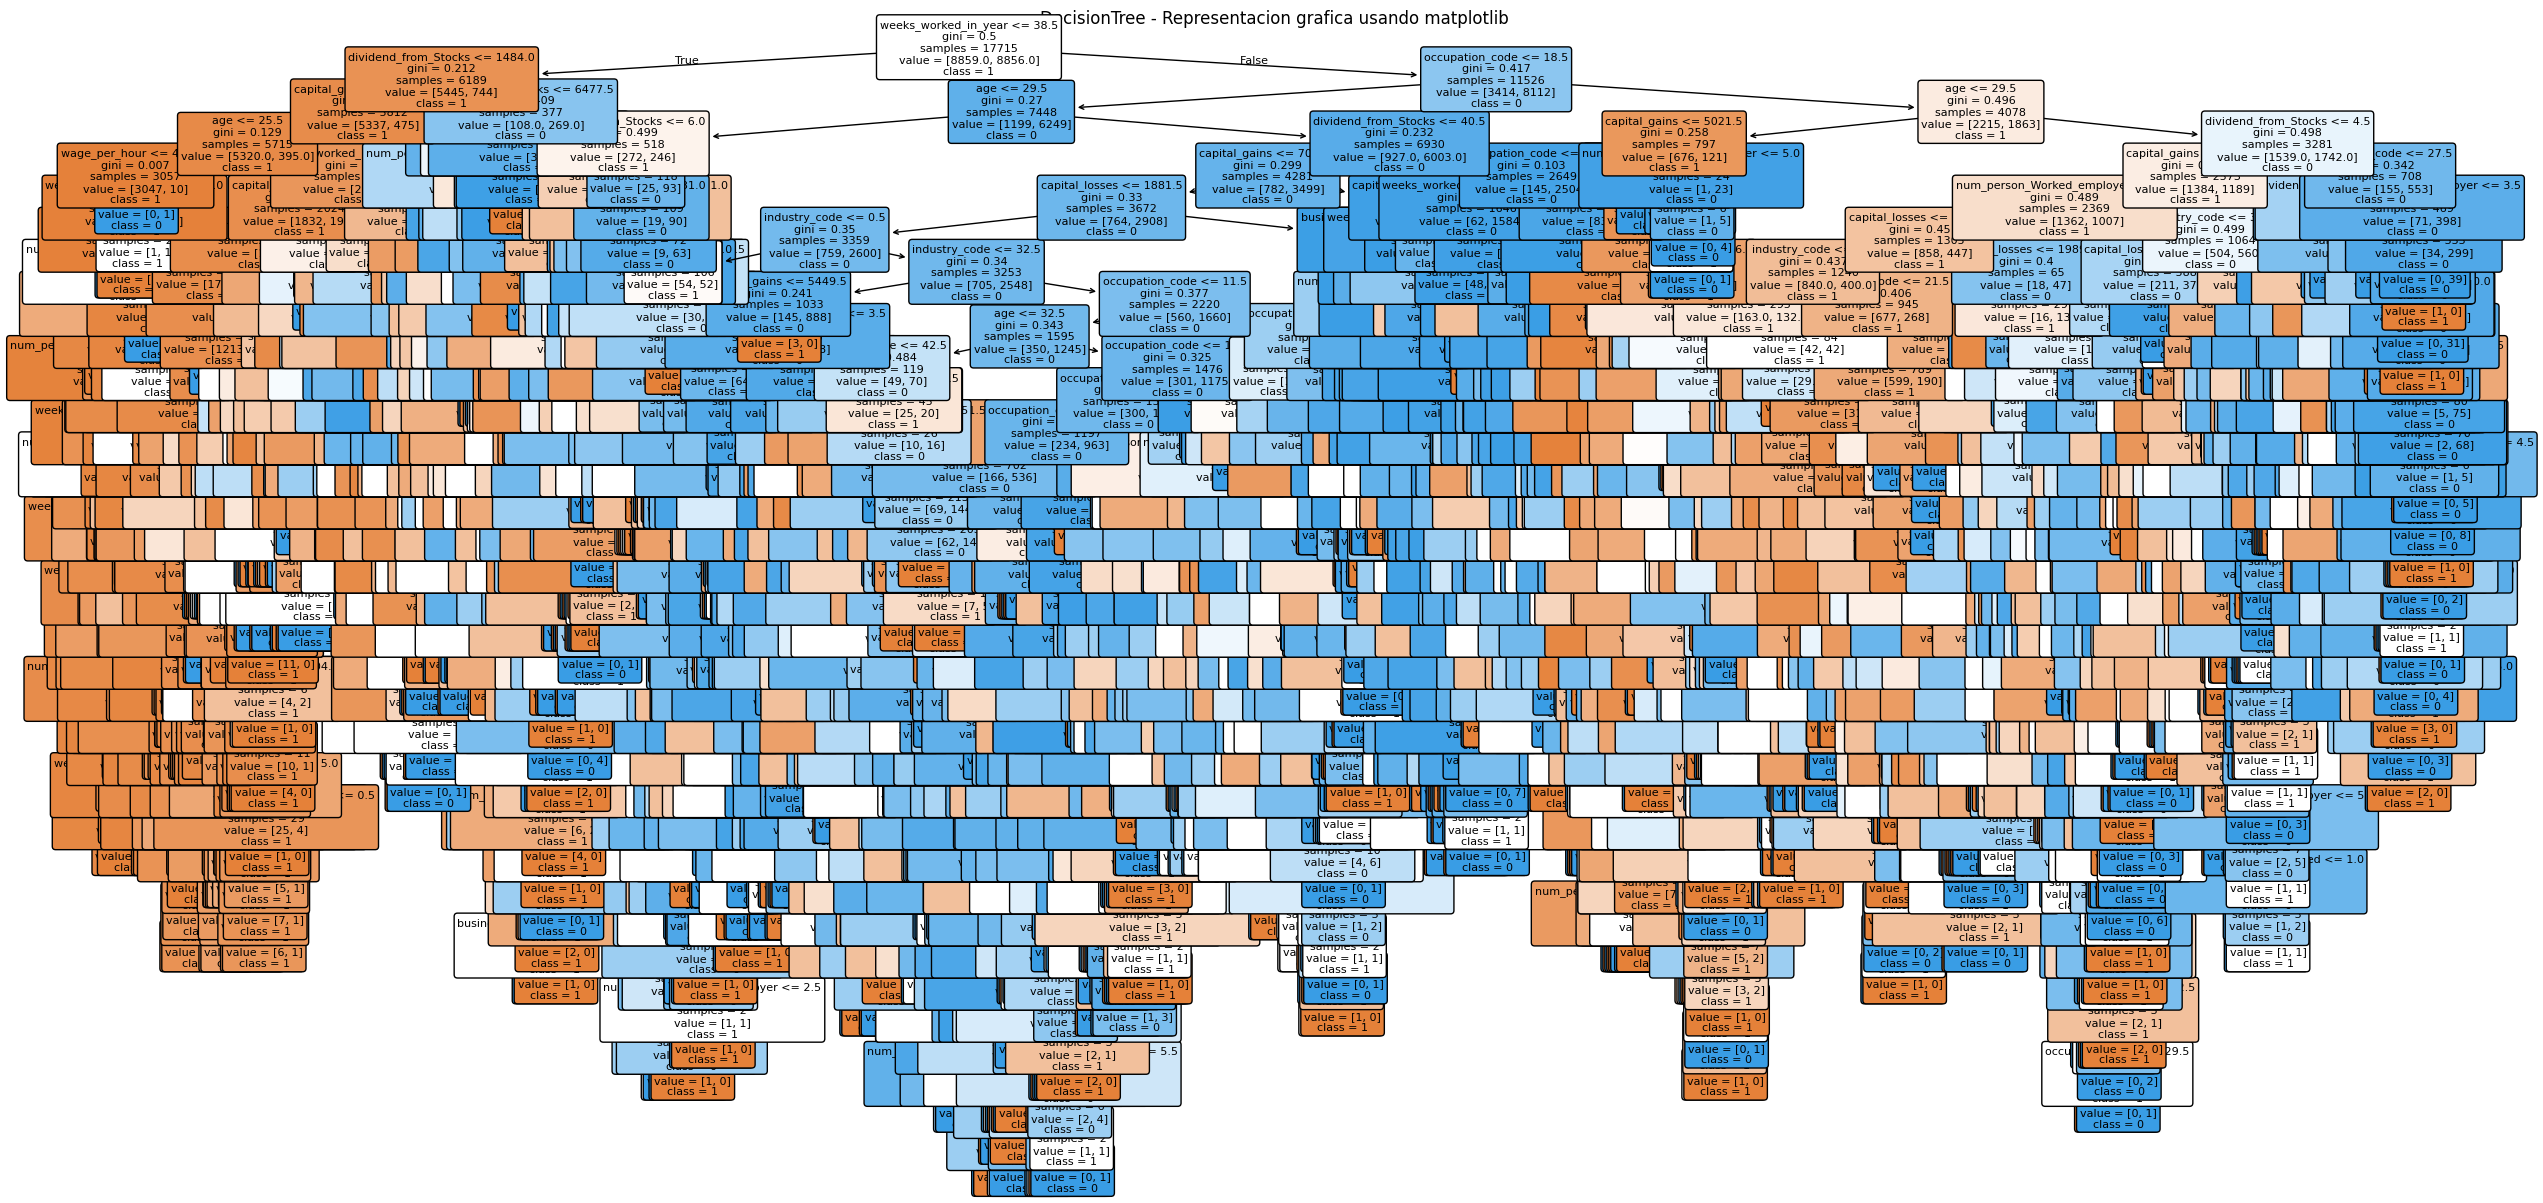

In [20]:
# Representacion grafica del modelo
# Segundo intento por visualizar el modelo

plt.figure(figsize = (30,15))
plot_tree(dt_base,
          feature_names = X.columns,
          class_names = y.unique().astype(str),
          filled = True,
          rounded = True ,
          fontsize = 8
          )
plt.title("DecisionTree - Representacion grafica usando matplotlib")
plt.show()

In [26]:
dt_base.get_depth()

35

In [22]:
# Representacion grafica del modelo
# Tercer intento por visualizar el modelo : export_graphviz + graphviz

# Expartamos nuestro arbol de decision a un formato DOT
dot_data_dt = export_graphviz(
    dt_base,
    out_file = None,
    feature_names = X.columns,
    class_names = y.unique().astype(str),
    filled = True,
    rounded = True,
    special_characters = True
)

# Cargar el paquete graphviz
import graphviz
import pydotplus

# Renderizar con graphviz
graph = graphviz.Source(dot_data_dt)
graph.render("dt_base", format = "png", cleanup = True)
graph

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Estrategia de barrido de Hiperparametros


In [23]:
# Documentacion de DecisionTreeClassifier
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies ar

In [24]:
# Documentacion de la clase GridSearchCV
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |
 |  Exhaustive search over specified parameter values for an estimator.
 |
 |  Important members are fit, predict.
 |
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |
 |  Read more in the :ref:`User Guide <grid_search>`.
 |
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either estimator needs

(18648,)

In [29]:
# Primer Paso para nuestro primer barrido de hiperparametros es definir el diccionario
# con los argumentos a considerar de la clase a ajustar

dict_HP_DT = {
    "criterion" : ["gini", "entropy", "log_loss"],
    "max_depth" : [5,10,15,20,25,30,50,90,150],
    "min_samples_split"  : [0.1, 0.15, 0.25,0.45,0.65,0.77],
    "max_features" : [3,6,9,10],
    "ccp_alpha" : np.linspace(0.1,100, 15)
}

# Instancia Plantilla
dt = DecisionTreeClassifier()

# Configuremos el barrido de Hiperparametros
dt_gs1 = GridSearchCV(
    estimator = dt,
    param_grid = dict_HP_DT,
    cv = 5,
    scoring = "accuracy",
    n_jobs = -1
)

# Ajuste del gs configurado
dt_gs1.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': array([  0.1       ,   7.23571429,  14.37142857,  21.50714286,
        28.64285714,  35.77857143,  42.91428571,  50.05      ,
        57.18571429,  64.32142857,  71.45714286,  78.59285714,
        85.72857143,  92.86428571, 100.        ]),
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, 20, 25, 30, 50, 90, 150],
                         'max_features': [3, 6, 9, 10],
                         'min_samples_split': [0.1, 0.15, 0.25, 0.45, 0.65,
                                               0.77]},
             scoring='accuracy')

In [ ]:
# Cuanto termine este procedimiendo : Estudies al objeto dt_gs1